# Research Methods 
## 2012 Olympics Hypothesis Testing

**04. December 2017**

Fabian Karl & Robert Brown


In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy.optimize as opt

import matplotlib.pyplot as plt

pd.options.display.max_columns = 2000

In [2]:
df = pd.read_csv('london-2012.csv', thousands=',')
df = df.drop(['Unnamed: 44'], axis=1)
df.head(10)

,ISO,GDP.2011,pop.2010,Country name,NOC,F.2012,M.2012,NOC SIZE,NOC.Size.Per.100K.pop,Gold,Silver,Bronze,Total,Bronze.Per.100K.pop,Silver.Per.100K.pop,Gold.Per.100K.pop,Total.Per.100K.pop,Bronze.Per.1BN.GDP,Silver.Per.1BN.GDP,Gold.Per.1BN.GDP,Total.Per.1BN.GDP,Bronze.Per.Athlete,Silver.Per.Athlete,Gold.Per.Athlete,Total.Per.Athlete,Bronze.pop,Silver.pop,Gold.pop,Total.pop,Bronze.GDP,Silver.GDP,Gold.GDP,Total.GDP,Bronze.Athlete,Silver.Athlete,Gold.Athlete,Total.Athlete,GDP rank score,Population rank score,Athlete rank score,Official medal ranking,GDP rank,Pop rank,Team size rank,"Total medal score (gold=3, silver =2, bronze=1)",Model-based score,Model-based rank
0,AFG,2.034346e+10,34385000,Afghanistan,AFG,1,5,6,0.017449,0,0,1,1,0.002908,0.000000,0.000000,0.002908,0.049156,0.000000,0.000000,0.049156,0.166667,0.000000,0.000000,0.166667,0.4,0.0,0.0,0.4,5.53,0.00,0.00,5.53,17.72,0.00,0.00,17.72,5.53,0.4,17.72,79,45,82,39,1,-0.725821,107
1,ALB,1.295956e+10,3205000,Albania,ALB,4,7,11,0.343214,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,86,86,85,86,0,-1.173997,125
2,DZA,1.886810e+11,35468000,Algeria,ALG,18,21,39,0.109958,1,0,0,1,0.000000,0.000000,0.002819,0.002819,0.000000,0.000000,0.005300,0.005300,0.000000,0.000000,0.025641,0.025641,0.0,0.0,0.3,0.3,0.00,0.00,0.54,0.54,0.00,0.00,4.23,4.23,1.62,0.9,12.69,58,68,78,58,3,-5.829173,169
3,ASM,5.370000e+08,68420,American Samoa,ASA,1,4,5,7.307805,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,86,86,85,86,0,-0.104260,56
4,AND,3.491000e+09,84864,Andorra,AND,2,4,6,7.070136,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,86,86,85,86,0,-0.412898,90
5,AGO,1.009900e+11,19082000,Angola,ANG,30,5,35,0.183419,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,86,86,85,86,0,-5.505927,167
6,ATG,1.128709e+09,88000,Antigua and Barbuda,ANT,2,3,5,5.681818,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,86,86,85,86,0,-0.180710,67
7,ARG,4.459890e+11,40412000,Argentina,ARG,43,99,142,0.351381,1,1,2,4,0.004949,0.002475,0.002475,0.009898,0.004484,0.002242,0.002242,0.008969,0.014085,0.007042,0.007042,0.028169,0.7,0.4,0.3,1.4,0.50,0.34,0.23,1.07,1.50,0.91,1.16,3.57,1.87,2.4,6.80,43,64,65,76,7,-9.630904,184
8,ARM,1.024779e+10,3092000,Armenia,ARM,4,21,25,0.808538,0,1,2,3,0.064683,0.032342,0.000000,0.097025,0.195164,0.097582,0.000000,0.292746,0.080000,0.040000,0.000000,0.120000,9.3,5.3,0.0,14.6,21.94,14.64,0.00,36.58,8.50,5.17,0.00,13.67,51.22,19.9,18.84,53,8,29,37,4,3.012326,30
9,ABW,2.456000e+09,108000,Aruba,ARU,1,3,4,3.703704,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,86,86,85,86,0,-0.320914,82


In [3]:
fisher_transform = lambda r_xy: 0.5*np.log((1+r_xy)/(1-r_xy))

First, lets create a few simple plots and investigate linear correlations between a few variables using the fisher transform.

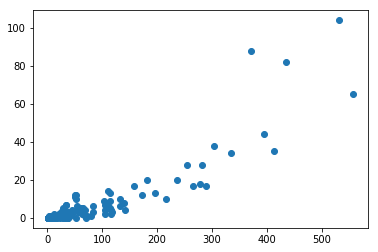

p value: 0.151206351546


In [4]:
fig, ax = plt.subplots()
ax.scatter(df['NOC SIZE'], df['Total'])
plt.show()

r = np.corrcoef(df['NOC SIZE'], df['Total'])[0][1]
z = fisher_transform(r)
print 'p value: {0}'.format(2*stats.norm.sf(z))

NOC SIZE (somewhat unsurprisingly) seems to have a relatively important linear relationship with metals won

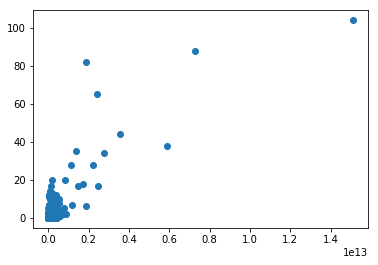

p value: 0.226197855557


In [5]:
fig, ax = plt.subplots()
ax.scatter(df['GDP.2011'], df['Total'])
plt.show()

r = np.corrcoef(df['GDP.2011'], df['Total'])[0][1]
z = fisher_transform(r)
print 'p value: {0}'.format(2*stats.norm.sf(z))

GDP seems to have a similarly important linear relationship with metals won

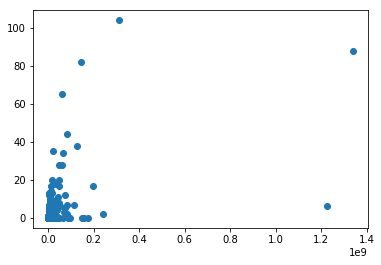

p value: 0.609176576658


In [6]:
fig, ax = plt.subplots()
ax.scatter(df['pop.2010'], df['Total'])
plt.show()

r = np.corrcoef(df['pop.2010'], df['Total'])[0][1]
z = fisher_transform(r)
print 'p value: {0}'.format(2*stats.norm.sf(z))

In [7]:
rows = df.median().keys()
def centeral_limit_theorem_samples(split_with, N = 30, M = 1000):
    median = df[split_with].median()
    below = df[df[split_with] <= median]
    above = df[df[split_with] > median]

    samples = {'above':[], 'below':[]}
    for _ in range(M):
        samples['above'].append(above.sample(N).mean())
        samples['below'].append(below.sample(N).mean())
        
    mu = {'above':{}, 'below':{}}
    for row in rows:
        mu['above'][row] = list(map(lambda x: x[row], samples['above']))
        mu['below'][row] = list(map(lambda x: x[row], samples['below']))
    return samples, mu

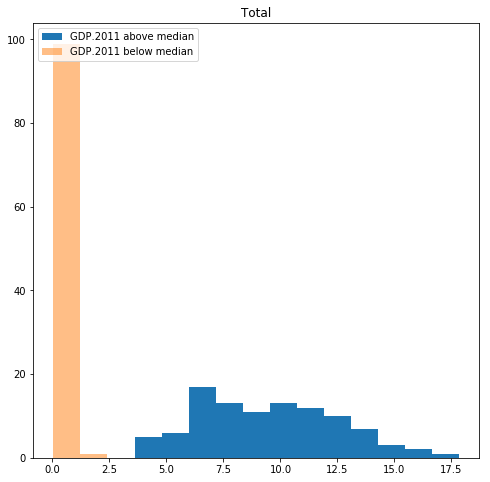

p value: 6.81287164228e-52


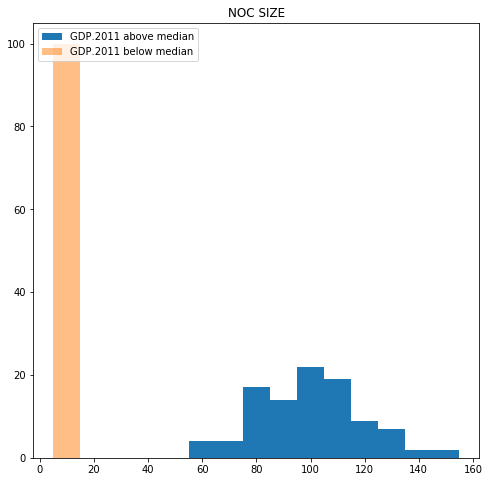

p value: 8.86347113501e-69


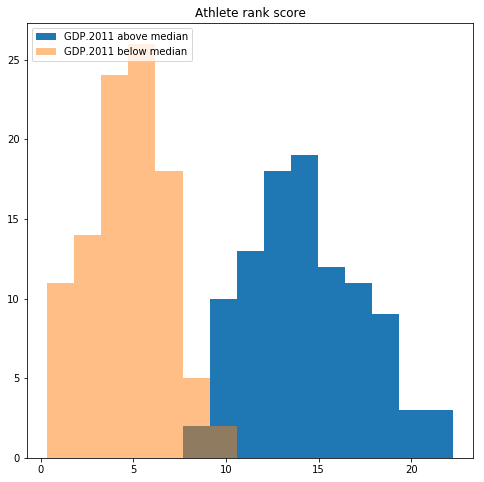

p value: 6.6942339099e-61


In [8]:
split_feature = 'GDP.2011'
samples, mu = centeral_limit_theorem_samples(split_feature, N = 25, M = 100)

for feature in ['Total', 'NOC SIZE', 'Athlete rank score']:
    a = mu['above'][feature]
    b = mu['below'][feature]

    fig = plt.figure(figsize=(8, 8))
    axes = fig.add_subplot(111)

    bins=np.histogram(np.hstack((a,b)), bins=15)[1]
    axes.hist(a, bins, label = '{0} above median'.format(split_feature))
    axes.hist(b, bins, label = '{0} below median'.format(split_feature), alpha=0.5)
    axes.set_title(feature)
    axes.legend(loc=2);
    plt.show(fig)

    res = stats.ttest_ind(a, b, equal_var=False)
    print 'p value: {0}'.format(res.pvalue)


These are all unbelievably significant (literally). Lets find a super biased feature and see if we can even reject a null-hypothesis with $\alpha = 0.01$

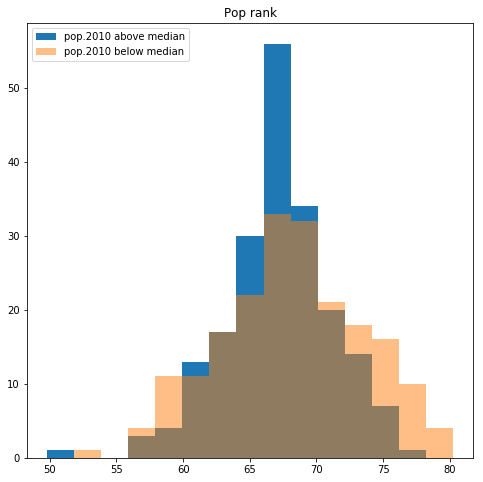

p value: 0.0252520269254


In [9]:
split_feature = 'pop.2010'
samples, mu = centeral_limit_theorem_samples(split_feature, N = 25, M = 200)

for feature in ['Pop rank']:
    a = mu['above'][feature]
    b = mu['below'][feature]

    fig = plt.figure(figsize=(8, 8))
    axes = fig.add_subplot(111)

    bins=np.histogram(np.hstack((a,b)), bins=15)[1]
    axes.hist(a, bins, label = '{0} above median'.format(split_feature))
    axes.hist(b, bins, label = '{0} below median'.format(split_feature), alpha=0.5)
    axes.set_title(feature)
    axes.legend(loc=2);
    plt.show(fig)

    res = stats.ttest_ind(a, b, equal_var=False)
    print 'p value: {0}'.format(res.pvalue)


Barely...kind of suspicious. Also appears to be a function of M. As M increases, the p vaue seems to inherently converge on 0..